<a href="https://colab.research.google.com/github/Swastik3025/Bank_Marketing_Deposit/blob/main/Colab%20Notebook/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DRIVE MOUNTING AND DATASET LOADING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path='/content/drive/MyDrive/bank.csv'
df=pd.read_csv(path)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.shape

(11162, 17)

#EXPLORATORY DATA ANALYSIS

In [6]:
df.info()

print("Total Null Values:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
Total Null Values:
age          0
job          0
marital      0
education    0
default      0
balan

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


12


<Axes: >

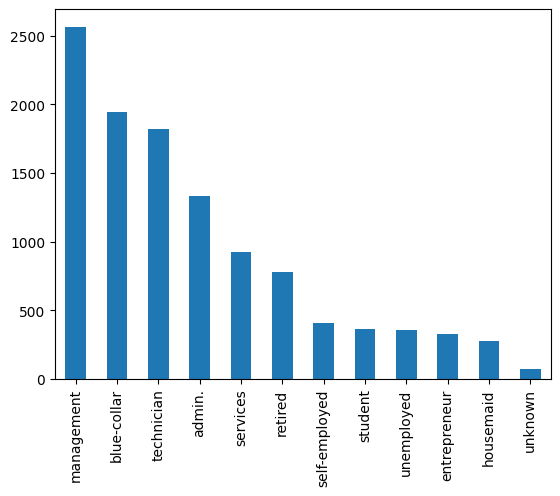

In [9]:
job_list=list(df['job'].unique())
print(len(job_list))
df['job'].value_counts().plot(kind='bar') #we can see that there are more number of management and blue collar peoples in comparison to other classes.

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


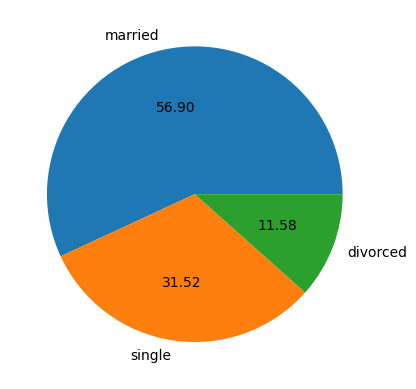

In [10]:
print(df['marital'].value_counts())
plt.pie(df['marital'].value_counts(),labels=['married','single','divorced'],autopct='%0.2f')
plt.show()

no     10994
yes      168
Name: default, dtype: int64


<Axes: >

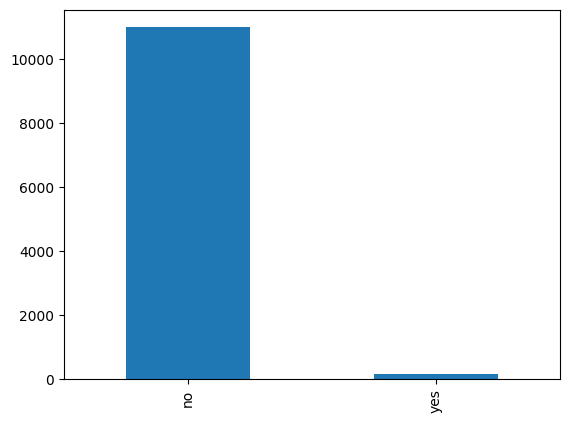

In [11]:
print(df['default'].value_counts())
df['default'].value_counts().plot(kind='bar')

no     5881
yes    5281
Name: housing, dtype: int64


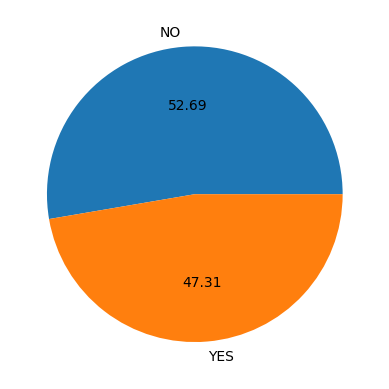

In [12]:
print(df['housing'].value_counts())
plt.pie(df['housing'].value_counts(),labels=['NO','YES'],autopct='%0.2f')
plt.show()

In [13]:
print(df['deposit'].value_counts())

no     5873
yes    5289
Name: deposit, dtype: int64


cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


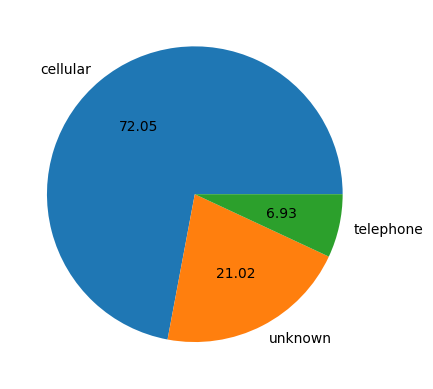

In [14]:
print(df['contact'].value_counts())
plt.pie(df['contact'].value_counts(),labels=['cellular','unknown','telephone'],autopct="%0.2f")
plt.show()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


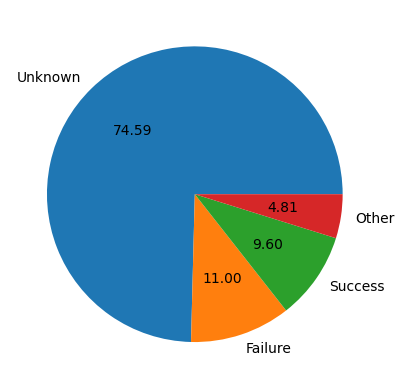

In [15]:
print(df['poutcome'].value_counts())
plt.pie(df['poutcome'].value_counts(),labels=['Unknown','Failure','Success','Other'],autopct="%0.2f")
plt.show()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


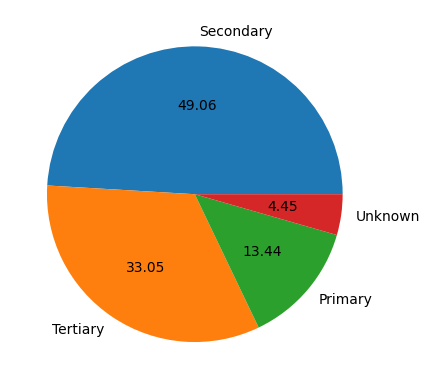

In [16]:
print(df['education'].value_counts())
plt.pie(df['education'].value_counts(),labels=['Secondary','Tertiary','Primary','Unknown'],autopct='%0.2f')
plt.show()

Text(0.5, 1.0, 'Deposit wrt Job')

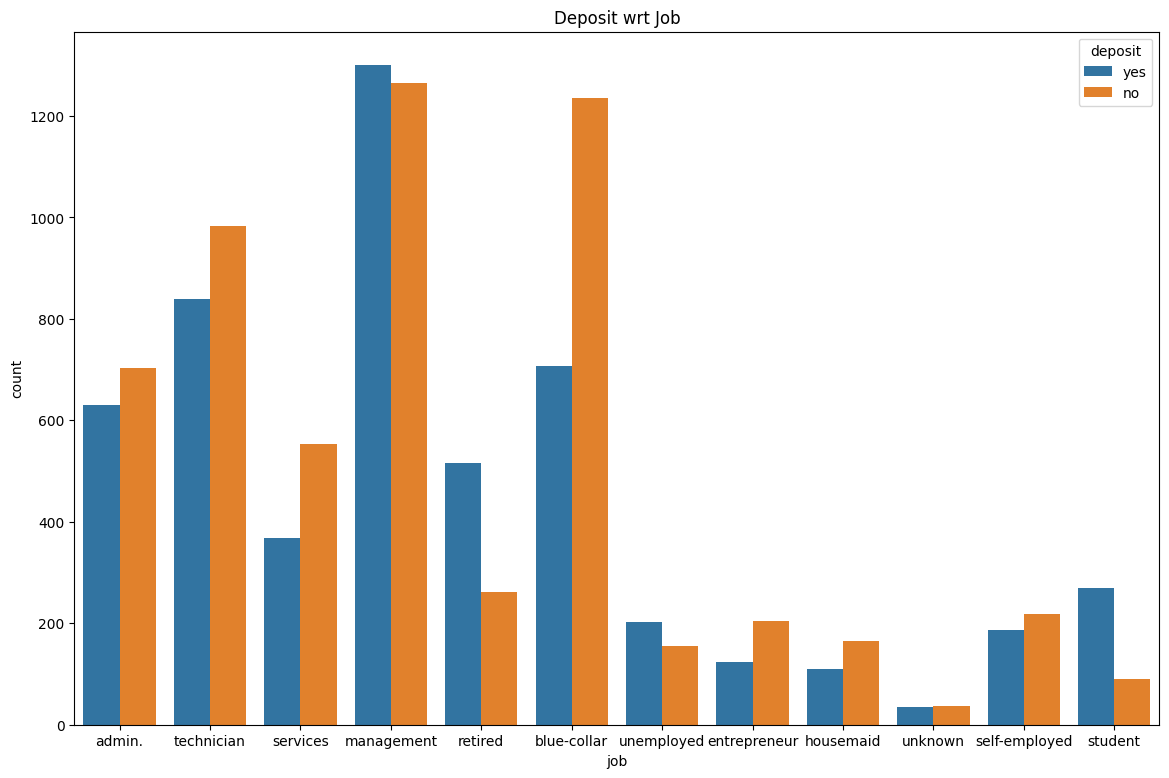

In [17]:
plt.figure(figsize=(14,9))
sns.countplot(x="job",hue="deposit",data=df)
plt.title('Deposit wrt Job')

Text(0.5, 1.0, 'Deposit wrt Education')

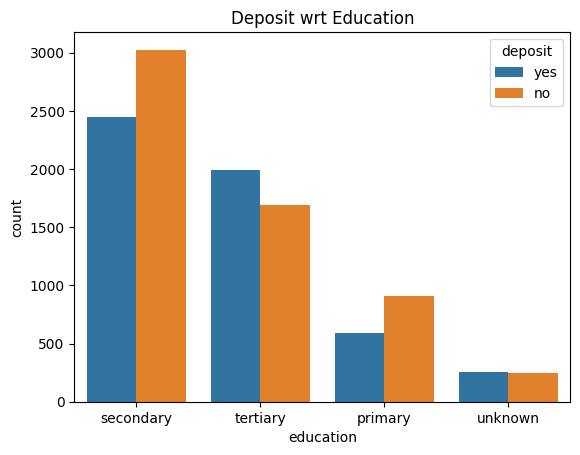

In [18]:
sns.countplot(x="education",hue="deposit",data=df)
plt.title('Deposit wrt Education')

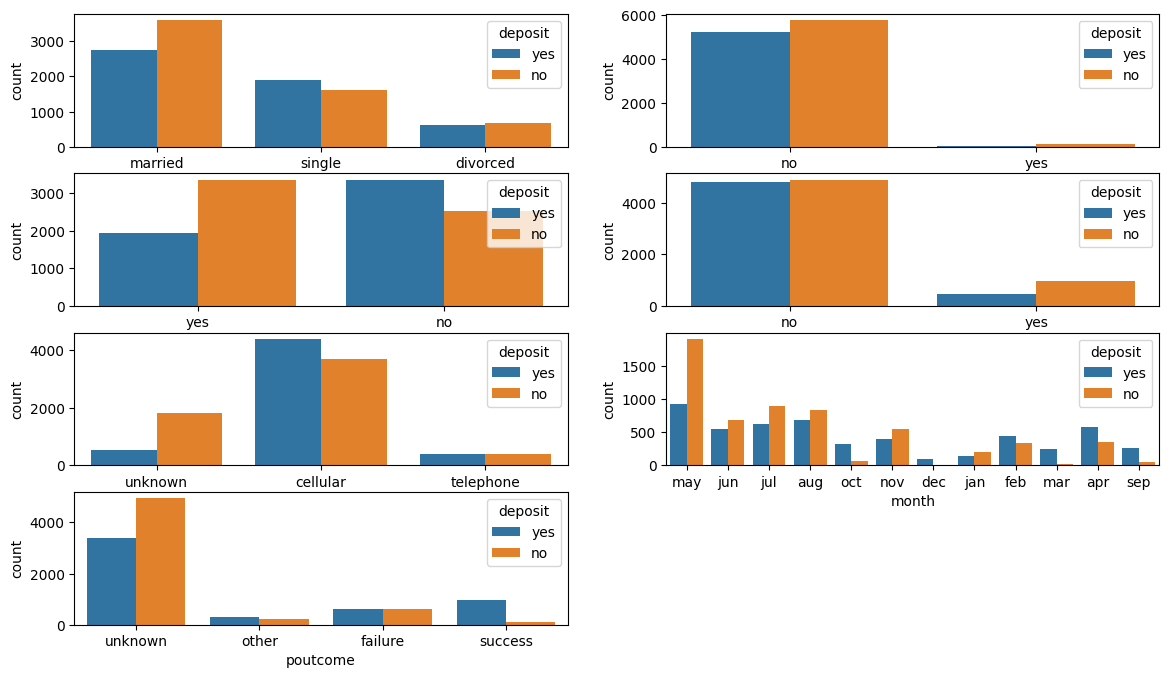

In [19]:
colmns=['marital','default','housing','loan','contact','month','poutcome']
df[colmns]
plt.figure(figsize=(14,10))
for i,features in enumerate(df[colmns]):
    plt.subplot(5,2,i+1)
    sns.countplot(x=features,hue='deposit',data=df)

plt.show()

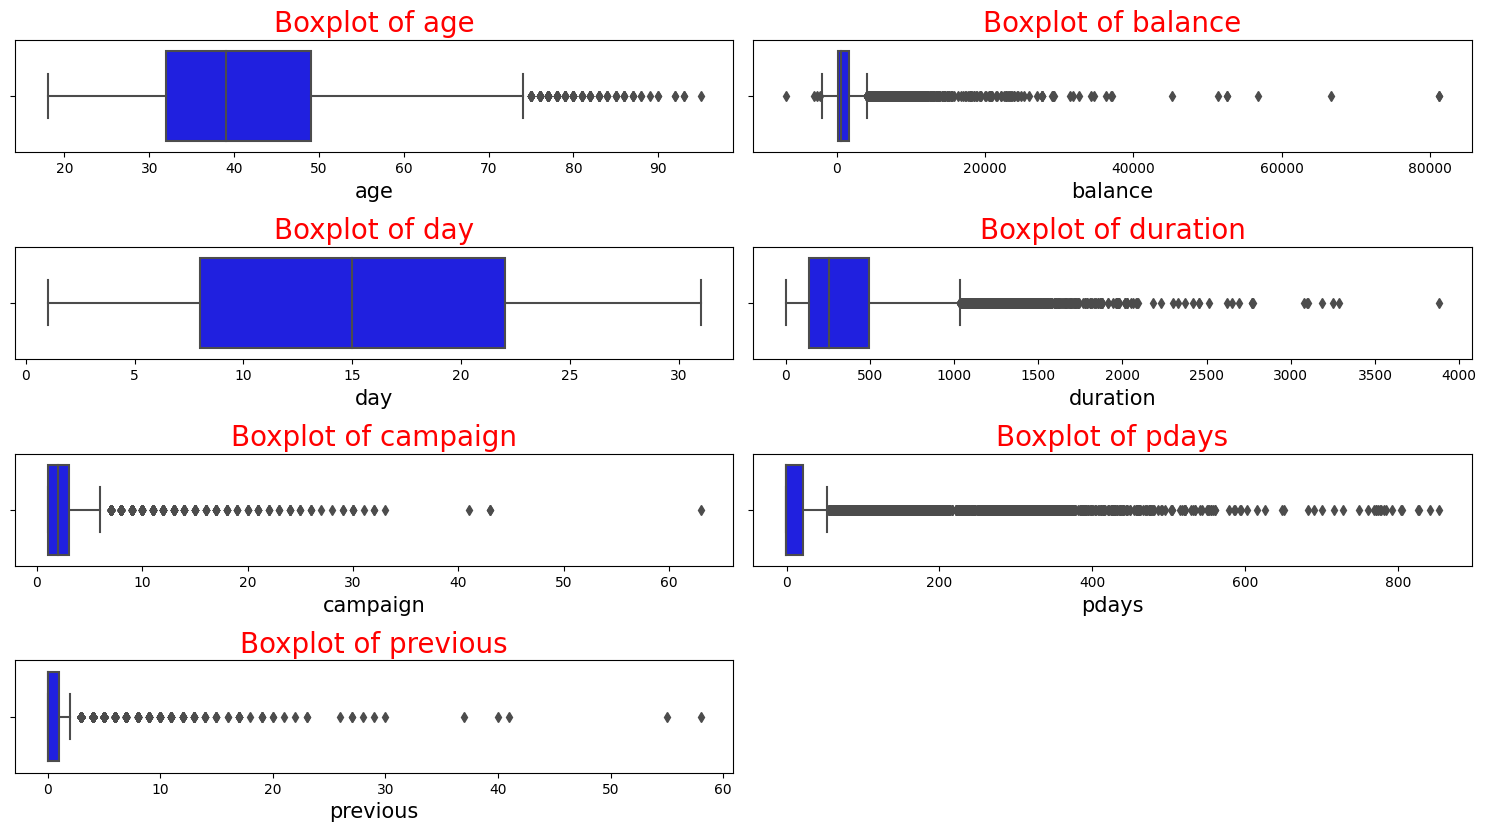

In [20]:
int_colmns=['age','balance','day','duration','campaign','pdays','previous']
df[int_colmns]
plt.figure(figsize=(15,10))
for i,features in enumerate(int_colmns):
  plt.subplot(5,2,i+1)
  sns.boxplot(x=features,data=df[int_colmns],color='blue')
  plt.title("Boxplot of {}".format(features),size=20,color="red")
  plt.xlabel("{}".format(features),size=15)
plt.tight_layout()
plt.show()

#OUTLIERS HANDLING

In [21]:
df_1=df.describe()   #outliers def->lower bound=(q1-1.5*iqr) upper bound=(q3+1.5*iqr)   where iqr=q3-q1
df_1

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [22]:
#Outliers calc for each int classes
# Age-> <6.5&>74.5
# Balance-> <-2257&>4087
# Day->
# Duration-> >1033
# Campaign->
# pdays->
# previous->

In [23]:
df_copy=df

In [24]:
df_copy.drop("pdays",inplace=True,axis=1)

In [25]:
df_copy.drop(df[df_copy['balance']>40000].index,inplace=True,axis=0)
df_copy.drop(df[df_copy['duration']>3000].index,inplace=True,axis=0)
df_copy.drop(df[df_copy['campaign']>40].index,inplace=True,axis=0)
df_copy.drop(df[df_copy['previous']>30].index,inplace=True,axis=0)

In [26]:
print("Shape after removing outliers:",df_copy.shape)

Shape after removing outliers: (11138, 16)


In [27]:
df_copy.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,0,unknown,yes


#LABEL ENCODING

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

list=['job','marital','education','housing','loan','contact','month','poutcome','deposit','default']
for i in list:
  df_copy[i]=label_encoder.fit_transform(df_copy[i])

In [29]:
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,5,0,0


#SPLITTING DATASET

In [30]:
from sklearn.model_selection import train_test_split
X=df_copy.drop('deposit',axis=1)
y=df_copy['deposit']    #deposit column will be our target class

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Train-Test Split Completed!")

Train-Test Split Completed!


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8910, 15)
(2228, 15)
(8910,)
(2228,)


In [54]:
from sklearn.metrics import classification_report,confusion_matrix
def conf_mat(y1,y2):
  cnf_matrix=confusion_matrix(y1,y2)
  p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')
  plt.title('Confusion matrix',y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

#LOGISTIC REGRESSION

Train_Accuracy: 0.7885521885521886
Testing Accuracy: 0.8011669658886894
Training:               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1150
           1       0.79      0.79      0.79      1078

    accuracy                           0.80      2228
   macro avg       0.80      0.80      0.80      2228
weighted avg       0.80      0.80      0.80      2228

Testing:               precision    recall  f1-score   support

           0       0.79      0.81      0.80      4712
           1       0.78      0.76      0.77      4198

    accuracy                           0.79      8910
   macro avg       0.79      0.79      0.79      8910
weighted avg       0.79      0.79      0.79      8910



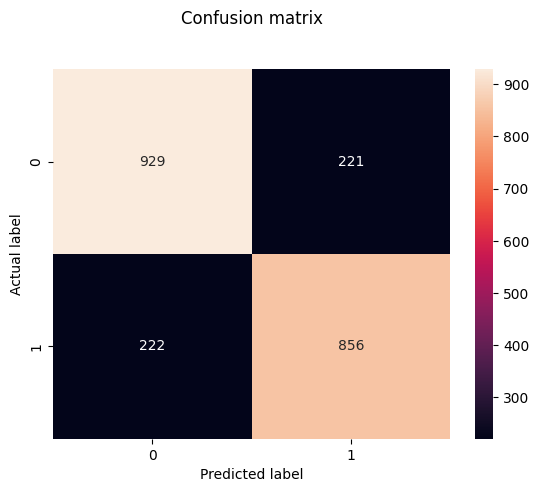

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

model1=LogisticRegression(max_iter=10000)
model1.fit(X_train,y_train)
y_test_pred1=model1.predict(X_test)
y_train_pred1=model1.predict(X_train)
logistic_accuracy=accuracy_score(y_test,y_test_pred1)
logistic_accuracy1=accuracy_score(y_train,y_train_pred1)
print("Train_Accuracy:",logistic_accuracy1)
print("Testing Accuracy:",logistic_accuracy)
print("Training:",classification_report(y_test,y_test_pred1))
print("Testing:",classification_report(y_train,y_train_pred1))
conf_mat(y_test,y_test_pred1)

#SUPPORT VECTOR MACHINE

Train_Accuracy: 0.724915824915825
Testing Accuracy: 0.7208258527827648
Training:               precision    recall  f1-score   support

           0       0.69      0.83      0.75      1150
           1       0.77      0.61      0.68      1078

    accuracy                           0.72      2228
   macro avg       0.73      0.72      0.72      2228
weighted avg       0.73      0.72      0.72      2228

Testing:               precision    recall  f1-score   support

           0       0.70      0.84      0.76      4712
           1       0.77      0.60      0.67      4198

    accuracy                           0.72      8910
   macro avg       0.73      0.72      0.72      8910
weighted avg       0.73      0.72      0.72      8910



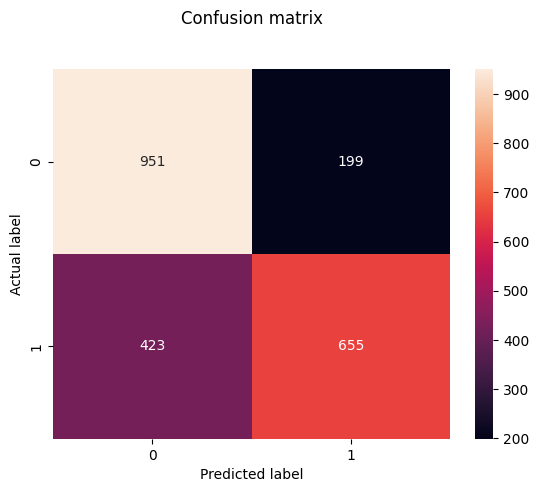

In [77]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#parameters={'kernel':('linear','rbf'),'C':[1,10]}

model2=SVC(kernel='rbf',C=1)
#clf=GridSearchCV(model2,parameters)
model2.fit(X_train,y_train)
y_test_pred2=model2.predict(X_test)
y_train_pred2=model2.predict(X_train)
svm_accuracy=accuracy_score(y_test,y_test_pred2)
svm_accuracy1=accuracy_score(y_train,y_train_pred2)
print("Train_Accuracy:",svm_accuracy1)
print("Testing Accuracy:",svm_accuracy)
print("Training:",classification_report(y_test,y_test_pred2))
print("Testing:",classification_report(y_train,y_train_pred2))
conf_mat(y_test,y_test_pred2)

#DECISION TREE

Train_Accuracy: 0.7885521885521886
Testing Accuracy: 0.8011669658886894
Training:               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1150
           1       0.79      0.79      0.79      1078

    accuracy                           0.80      2228
   macro avg       0.80      0.80      0.80      2228
weighted avg       0.80      0.80      0.80      2228

Testing:               precision    recall  f1-score   support

           0       0.79      0.81      0.80      4712
           1       0.78      0.76      0.77      4198

    accuracy                           0.79      8910
   macro avg       0.79      0.79      0.79      8910
weighted avg       0.79      0.79      0.79      8910



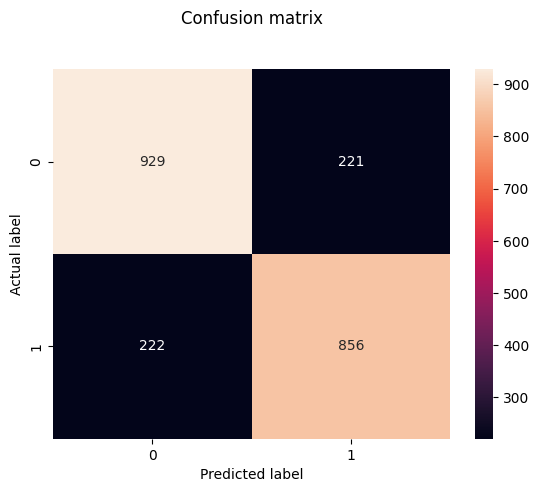

In [82]:
from sklearn.tree import DecisionTreeClassifier

model3=DecisionTreeClassifier(max_depth=20)
model3.fit(X_train,y_train)
y_test_pred3=model1.predict(X_test)
y_train_pred3=model1.predict(X_train)
dct_accuracy=accuracy_score(y_test,y_test_pred3)
dct_accuracy1=accuracy_score(y_train,y_train_pred3)
print("Train_Accuracy:",dct_accuracy1)
print("Testing Accuracy:",dct_accuracy)
print("Training:",classification_report(y_test,y_test_pred3))
print("Testing:",classification_report(y_train,y_train_pred3))

conf_mat(y_test,y_test_pred3)

#RANDOM FOREST

Train_Accuracy: 0.87003367003367
Testing Accuracy: 0.8375224416517055
Training:               precision    recall  f1-score   support

           0       0.87      0.80      0.84      1150
           1       0.81      0.87      0.84      1078

    accuracy                           0.84      2228
   macro avg       0.84      0.84      0.84      2228
weighted avg       0.84      0.84      0.84      2228

Testing:               precision    recall  f1-score   support

           0       0.90      0.85      0.87      4712
           1       0.84      0.89      0.87      4198

    accuracy                           0.87      8910
   macro avg       0.87      0.87      0.87      8910
weighted avg       0.87      0.87      0.87      8910



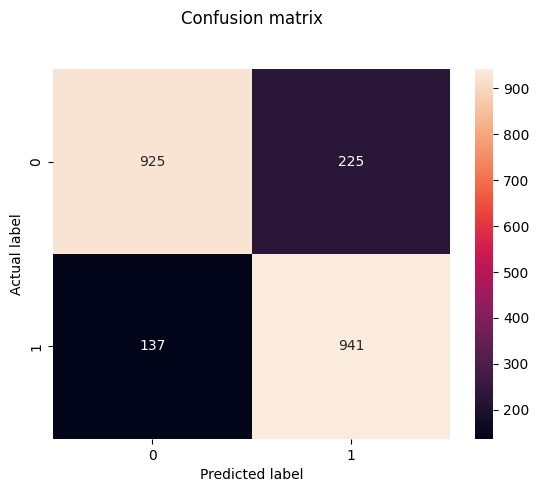

In [88]:
from sklearn.ensemble import RandomForestClassifier

model4=RandomForestClassifier(n_estimators=500,max_depth=9)
model4.fit(X_train,y_train)
y_test_pred4=model4.predict(X_test)
y_train_pred4=model4.predict(X_train)
rfc_accuracy=accuracy_score(y_test,y_test_pred4)
rfc_accuracy1=accuracy_score(y_train,y_train_pred4)
print("Train_Accuracy:",rfc_accuracy1)
print("Testing Accuracy:",rfc_accuracy)
print("Training:",classification_report(y_test,y_test_pred4))
print("Testing:",classification_report(y_train,y_train_pred4))

conf_mat(y_test,y_test_pred4)

#XGBOOST

Train_Accuracy: 0.9089786756453423
Testing Accuracy: 0.8604129263913824
Training:               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1150
           1       0.83      0.89      0.86      1078

    accuracy                           0.86      2228
   macro avg       0.86      0.86      0.86      2228
weighted avg       0.86      0.86      0.86      2228

Testing:               precision    recall  f1-score   support

           0       0.94      0.89      0.91      4712
           1       0.88      0.93      0.91      4198

    accuracy                           0.91      8910
   macro avg       0.91      0.91      0.91      8910
weighted avg       0.91      0.91      0.91      8910



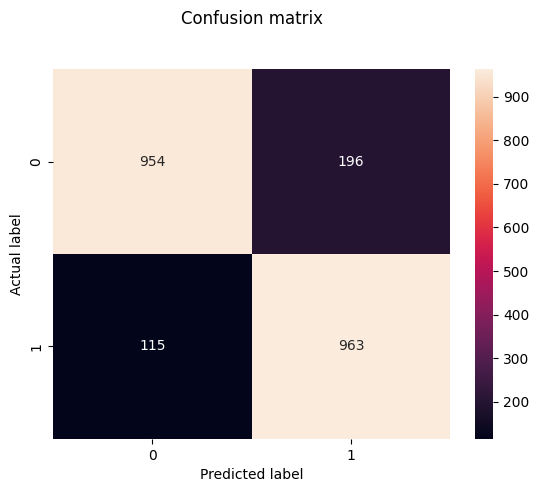

In [93]:
from xgboost import XGBClassifier

model5=XGBClassifier(n_estimators=35)
model5.fit(X_train,y_train)
y_test_pred5=model5.predict(X_test)
y_train_pred5=model5.predict(X_train)
xgb_accuracy=accuracy_score(y_test,y_test_pred5)
xgb_accuracy1=accuracy_score(y_train,y_train_pred5)
print("Train_Accuracy:",xgb_accuracy1)
print("Testing Accuracy:",xgb_accuracy)
print("Training:",classification_report(y_test,y_test_pred5))
print("Testing:",classification_report(y_train,y_train_pred5))

conf_mat(y_test,y_test_pred5)